In [78]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install gtts
!sudo apt-get install mpg321


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
mpg321 is already the newest version (0.3.2-3.1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [87]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from PIL import Image
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from gtts import gTTS
import os


In [88]:

# Read and process an image
img = Image.open('test3.png')
img2=cv2.imread('test3.png')
img2= cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
text = pytesseract.image_to_string(img)




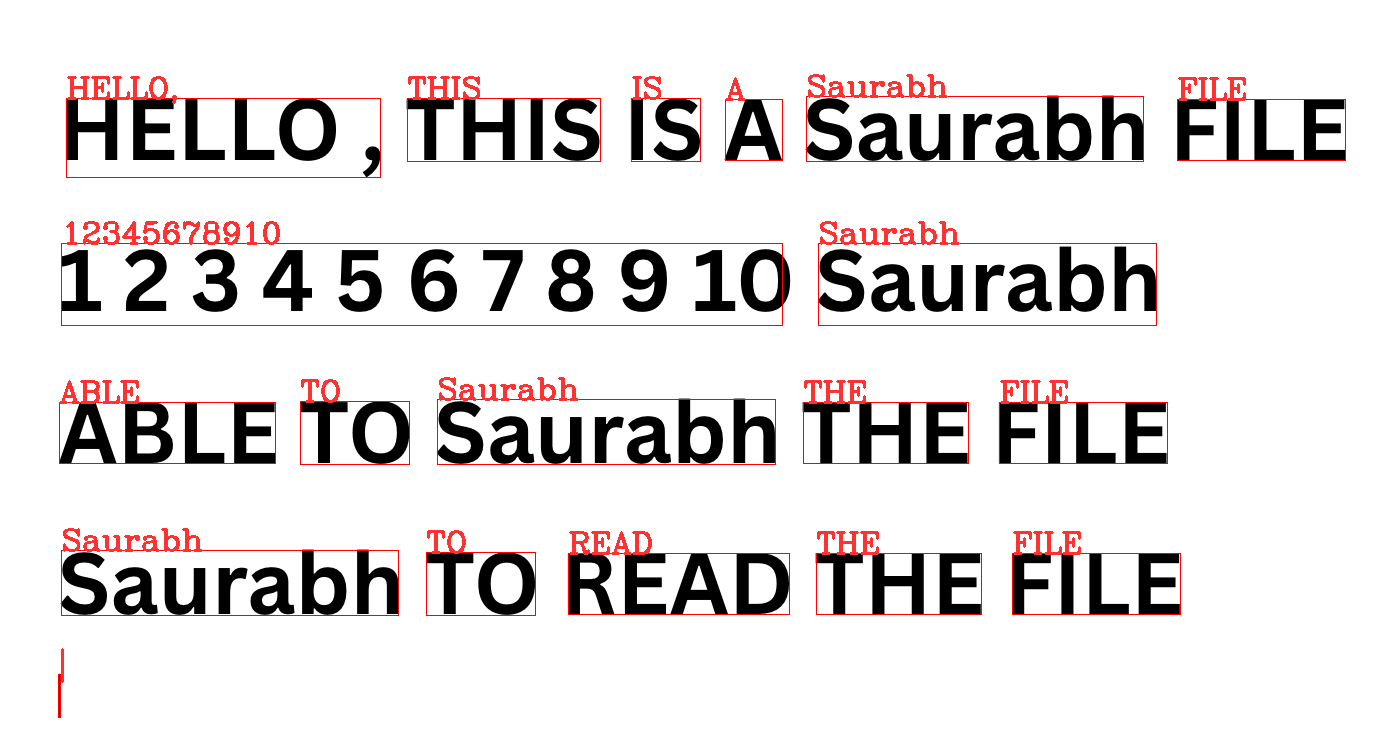

In [89]:
#detecting words
height,width,_=img2.shape
boxes=pytesseract.image_to_data(img2)
text=""
detected_text=""
for x,b in enumerate(boxes.splitlines()):
  # print(b)
  if x!=0:
    b=b.split()
    # print(b)
    if len(b)==12:
      text+=b[11]
      detected_text+=b[11]+" "
      x,y,w,h=int(b[6]),int(b[7]),int(b[8]),int(b[9])
      cv2.rectangle(img2,(x,y),(w+x,h+y),(0,0,255),1)
      cv2.putText(img2,b[11],(x,y),cv2.FONT_HERSHEY_COMPLEX,1,(50,50,255),2)

cv2_imshow(img2)


In [92]:
#KMP (Knuth-Morris-Pratt) Algorithm
def searchElementInTheImage(pattern):
  originalPattern=pattern
  pattern+='#'+ text
  m = len(pattern)
  n=len(originalPattern)
  lps = [0] * m
  length = 0  # length of the previous longest prefix suffix
  i = 1

  while i<m:
    if pattern[i]==pattern[length]:
      length=length + 1
      lps[i]=length
      i+=1
    else:
      if length!=0:
        length=lps[length-1]
      else:
        length=0
        i+=1

  patternOccurenceCount=0 #occurence count
  for i in range (0,m):
    if lps[i]==n:
      patternOccurenceCount+=1

  return patternOccurenceCount



In [93]:
#SearchWordInImage
print(searchElementInTheImage("Saurabh"))

4


In [65]:
#Text_to_speech
tts = gTTS(text=detected_text, lang='en')
tts.save("detected_text.mp3") #file_name
os.system("mpg321 detected_text.mp3")


256

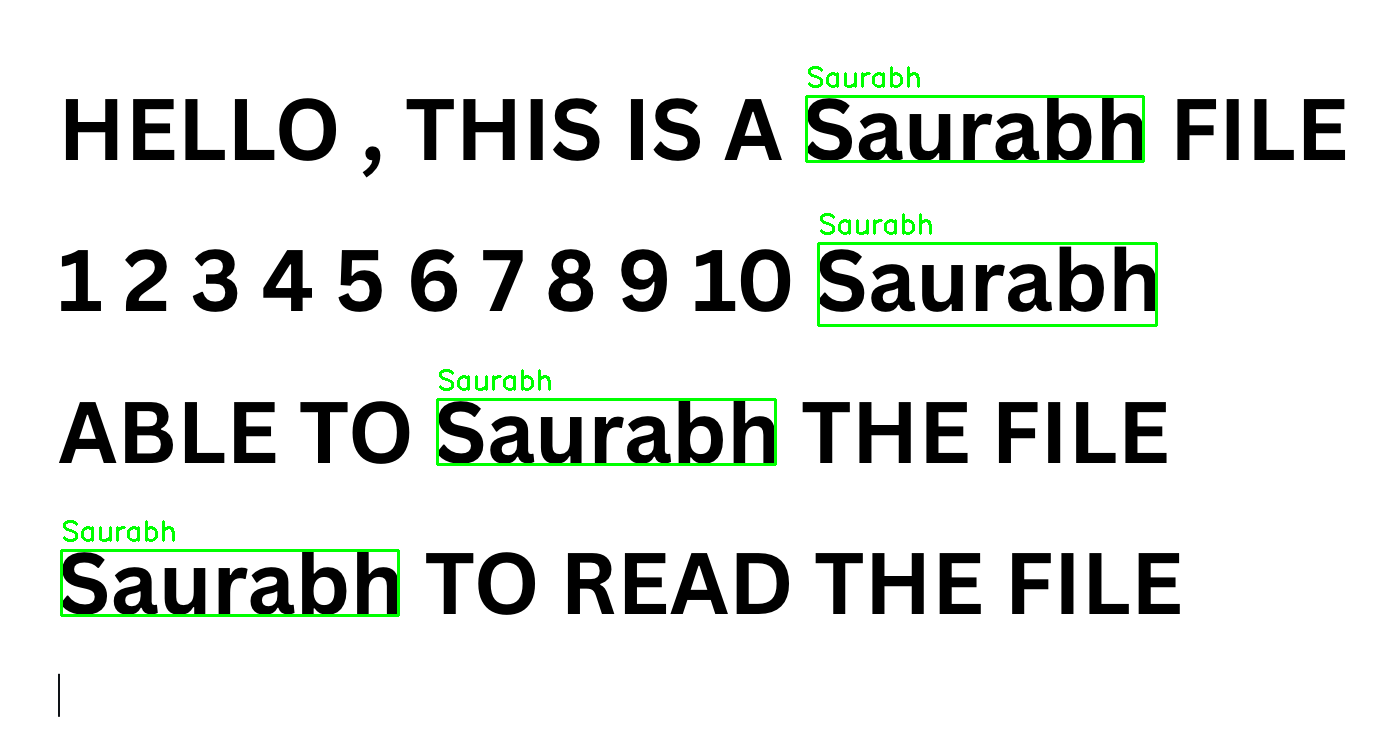

In [91]:
#Highlight Searched keyword
def extract_words_with_position(image_path):
    # Load image using OpenCV
    img = cv2.imread(image_path)

    # Use Tesseract to extract words with their bounding box coordinates
    data = pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT)

    # Extracting useful information
    words_with_pos = []
    for i, word in enumerate(data['text']):
        if word.strip():  # Skip empty strings
            x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
            words_with_pos.append((word, x, y, w, h))

    return img, words_with_pos

# Function to highlight the word on the image
def highlight_word_on_image(image, word_to_find, words_with_pos):
    for word, x, y, w, h in words_with_pos:
        if word.lower() == word_to_find.lower():
            # Draw a rectangle around the word
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            # Optionally, label the word on the image
            cv2.putText(image, word, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    return image

# Main Function
def highlight_word_in_image(image_path, word_to_find):
    img, words_with_pos = extract_words_with_position(image_path)
    result_image = highlight_word_on_image(img, word_to_find, words_with_pos)

    # Saving image
    output_path = 'highlighted_image.png'
    cv2.imwrite(output_path, result_image)

    cv2_imshow(result_image)


image_path = 'test3.png'  # Path to image
word_to_find = 'Saurabh'  # Word you want to find
highlight_word_in_image(image_path, word_to_find)